# MobileNet의 등장 배경?
---
구글의  Alphago의 경우 판후이와의 대결에서의 알파고는 `1202개의 CPU와 176개의 GPU`를 사용했고,  
2016년 3월의 이세돌 九단과의 대결에서는 GPU대신 `48개의 TPU`를 사용했다고 합니다.   
이 정도의 막대한 컴퓨팅파워를 가진 환경이라면 어떤 모델을 넣더라도 문제가 안 됨.

## 고성능이 아닌 환경?
---
고성능의 디바이스가 아니라 **자동차, 드론, 스마트폰과 같은 환경에서는 CPU를 하나 정도 가지고 있는 경우도 많고, GPU가 없을 수도 있으며, 메모리도 부족**합니다
-> colab도 batch size 키우면 잘안되곤함.

### MobileNet은 컴퓨터 성능이 제한되거나 배터리 퍼포먼스가 중요한 곳에서 사용될 목적으로 설계된 CNN 구조이다.

갤럭시 s7으로 돌린 mobile net

https://soundlly.github.io/2017/11/20/tensorflowlite-moblienet-demo/



## Depthwse Separable Convolutions
---
-  **depthwise convolution**과 **pointwise convolution**의 결합으로 보시면 됩니다.

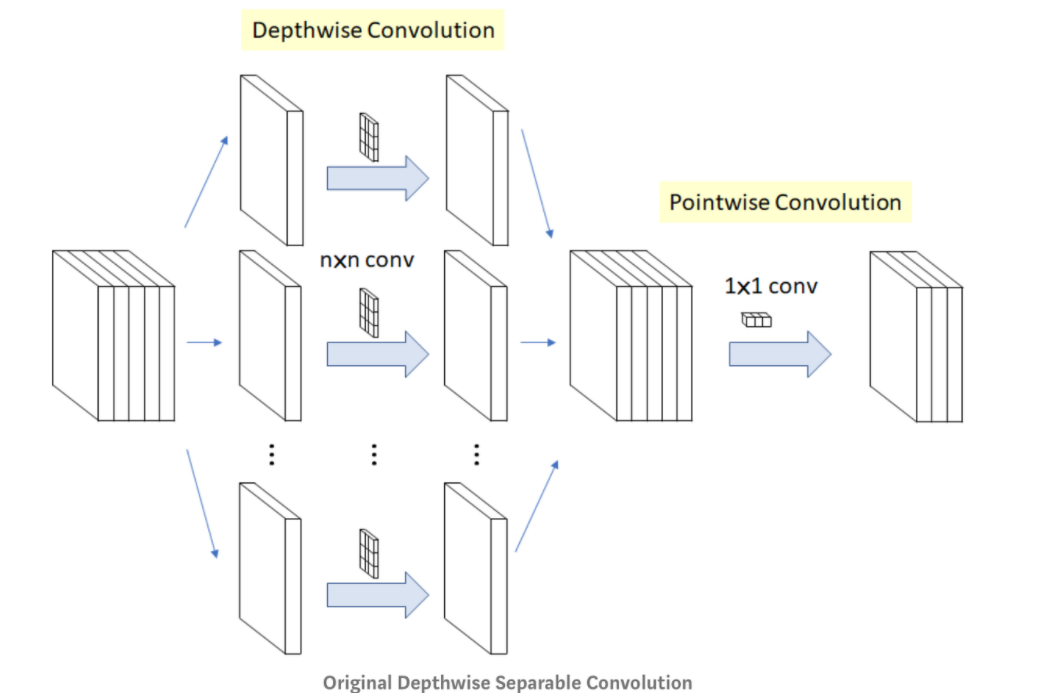

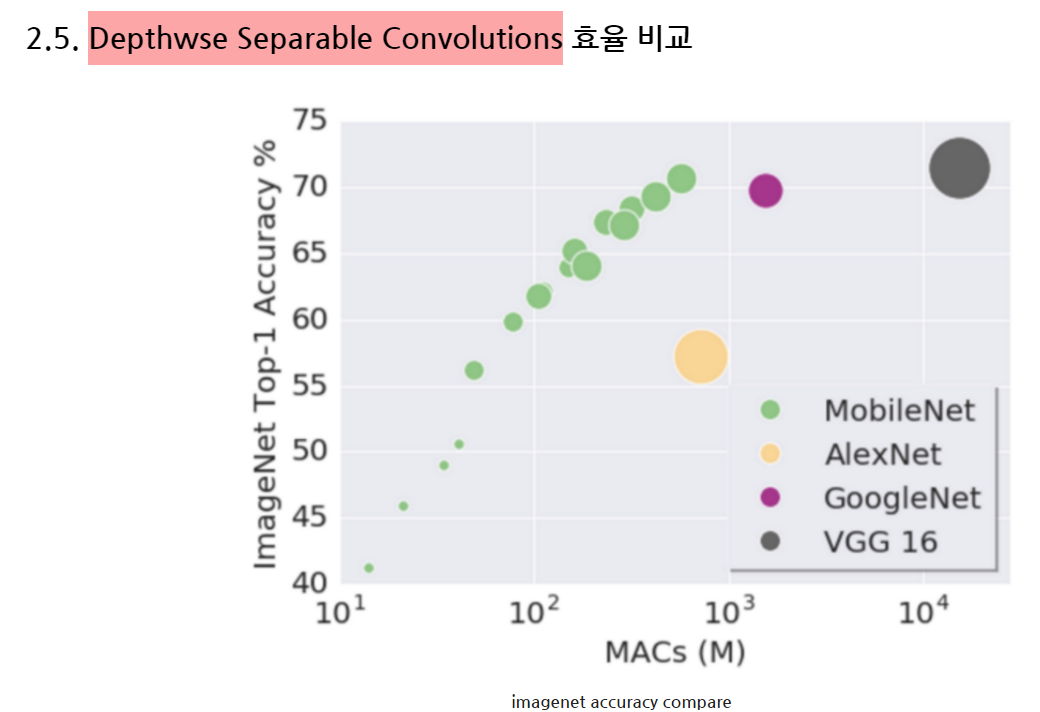

## mobileNet v2
---
- Linear Bottleneck block
- ReLu 6 
- Inverted Residulal connections
- SSD Lite


### LInear Bottleneck block
---
- mobile Net v1 의 연산량을 대략 살펴보면 
Dw : 3 x 3 x 64 = 576
PW : 1 x 1 x 64 x 64 = 4096

일반적으로 PW가 더 연산을 많이 필요로 함을 알 수있다.

mobileNet v2 는 Pw의 부담을 인식하고 DW 연산 비중을 올리는 테크닉을 사용
Expansion Layer, Projection Layer 가 추가 됨.

즉 , Expansion Layer PW에서 Channel을 늘려준 상태에서, DW를 하고
Projection Layer에서는 원래의 Channel 개수로 줄여주는 역할을 한다.
즉, Channel을 기준으로, Expansion 하고 Projection 한다고 생각하됨 .
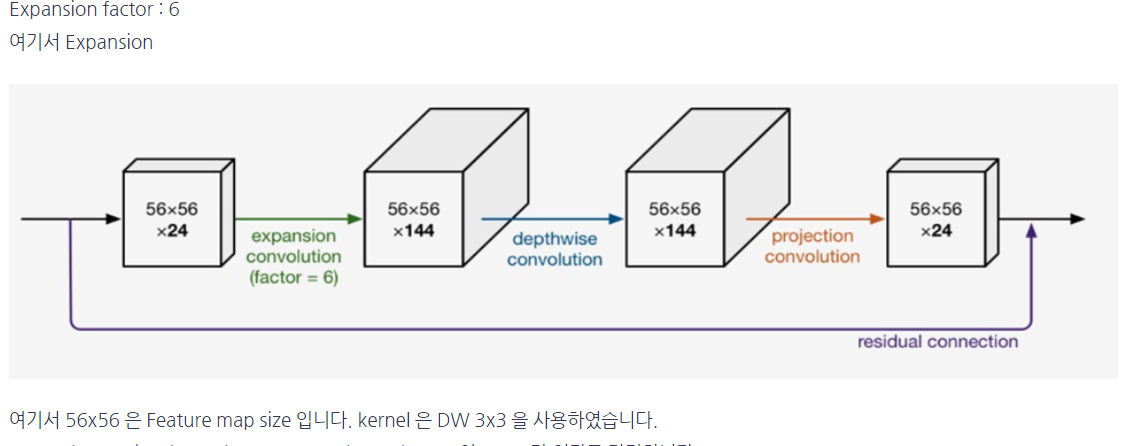

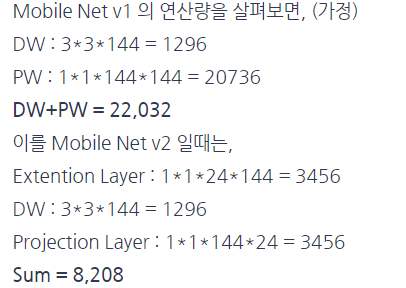

### ReLU6 activation 
---
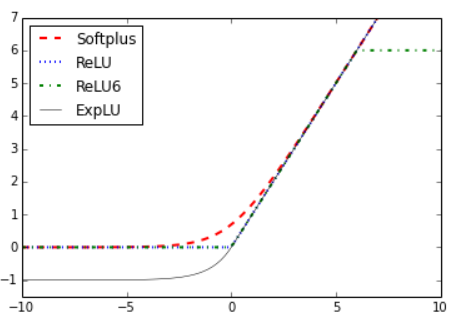

- ReLU6 는 Maximum value가 6을 넘지 못하게 하는 활성화 함수.
- 만약 upper bound가 없으면 point를 표현하는 데 수많은 bit를 사용해야 하지만 6으로 상한선을 두게 된다면 최대 3 bit만 있으면 되기 때문에 상한선을 두는 것은 최적화 관점에서 꽤나 도움이 됩니다.
- 이 논문에 따르면 ReLU에 상한선을 두게 되면 딥러닝 모델이 학습 할 때, sparse한 feature를 더 일찍 학습할 수 있게 된다는 이유로 상한선을 두었고 여러가지 테스트를 통해 확인해 보았을 때, 6을 상한선으로 둔 것이 성능에 좋았기 때문에 ReLU6를 사용했다는 것입니다.

# Mobile net v3
---
- 네트워크 개선 -> AutoML
- 원래 32필터를 사용했지만 절반인 16필터를사용
- 모바일에서는 sigmoid를 쓰기 힘들기 때문에  rele와 비슷한 h-swish라는 함수사용
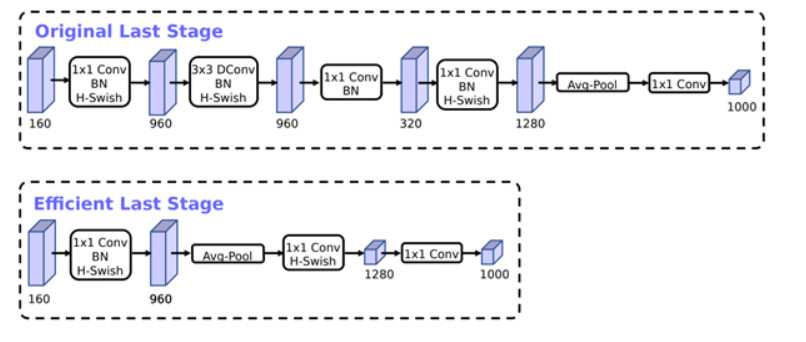

- 두가지 버전이 있음
    - lagre: 연산 속도가 높고 가벼운 모델 -> 정확도가 small에 비해 낮음
    - small : 연산속도가 좀더 낮고 무거운 모델 -> 속도가 large에 비해 낮음